In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

# Importing Data

In [74]:
data_set = pd.read_csv('/content/Nvidia_stock_data.csv', index_col='Date')

In [75]:
data_set.head()

,Close,High,Low,Open,Volume
Date,,,,,
1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


# Pre-Processing Data

In [76]:
data_set.head()

,Close,High,Low,Open,Volume
Date,,,,,
1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


In [77]:
data_set.describe()

,Close,High,Low,Open,Volume
count,6637.000000,6637.000000,6637.000000,6637.000000,6.637000e+03
mean,10.091263,10.279293,9.885371,10.091765,5.952182e+08
std,26.686641,27.192558,26.140134,26.706411,4.297521e+08
min,0.031283,0.032597,0.030566,0.032000,1.968000e+07
25%,0.259741,0.266981,0.251946,0.259053,3.333360e+08
50%,0.440848,0.447144,0.434353,0.440676,4.961320e+08
75%,4.888134,4.957336,4.810735,4.895365,7.269720e+08
max,149.416245,153.115916,147.806407,153.015919,9.230856e+09


In [78]:
data_set.index.max()

'2025-06-10'

In [79]:
data_set.index.min()

'1999-01-22'

In [80]:
data_set.Volume.min()

19680000

In [81]:
data_set.index.dtype

dtype('O')

In [82]:
data_set.index = pd.to_datetime(data_set.index)

In [83]:
data_set.index.dtype

dtype('<M8[ns]')

In [84]:
data_set.shape

(6637, 5)

In [85]:
data_set.isnull().count()

,0
Close,6637
High,6637
Low,6637
Open,6637
Volume,6637


In [86]:
import seaborn as sns

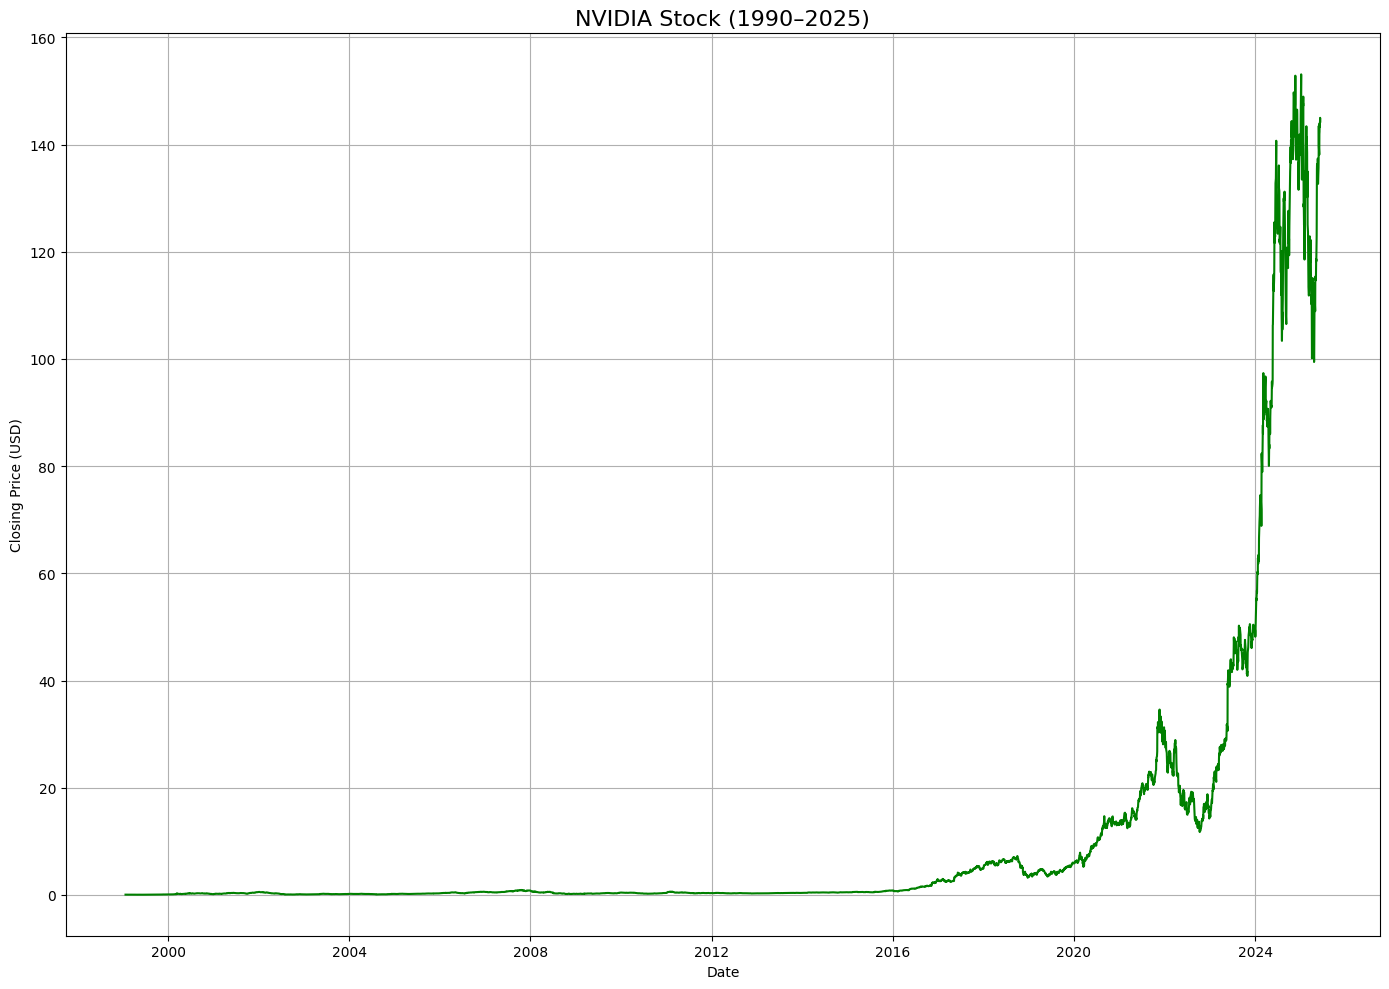

In [87]:
#NVIDIA CLosing Price

plt.figure(figsize=(14, 10))
# sns.lineplot(data=data_set, x=data_set.index, y='Open', color='red')
sns.lineplot(data=data_set, x=data_set.index, y='High', color='green')
# sns.lineplot(data=data_set, x=data_set.index, y='Low', color='yellow')
# sns.lineplot(data=data_set, x=data_set.index, y='Close', color='blue')
plt.title('NVIDIA Stock (1990–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

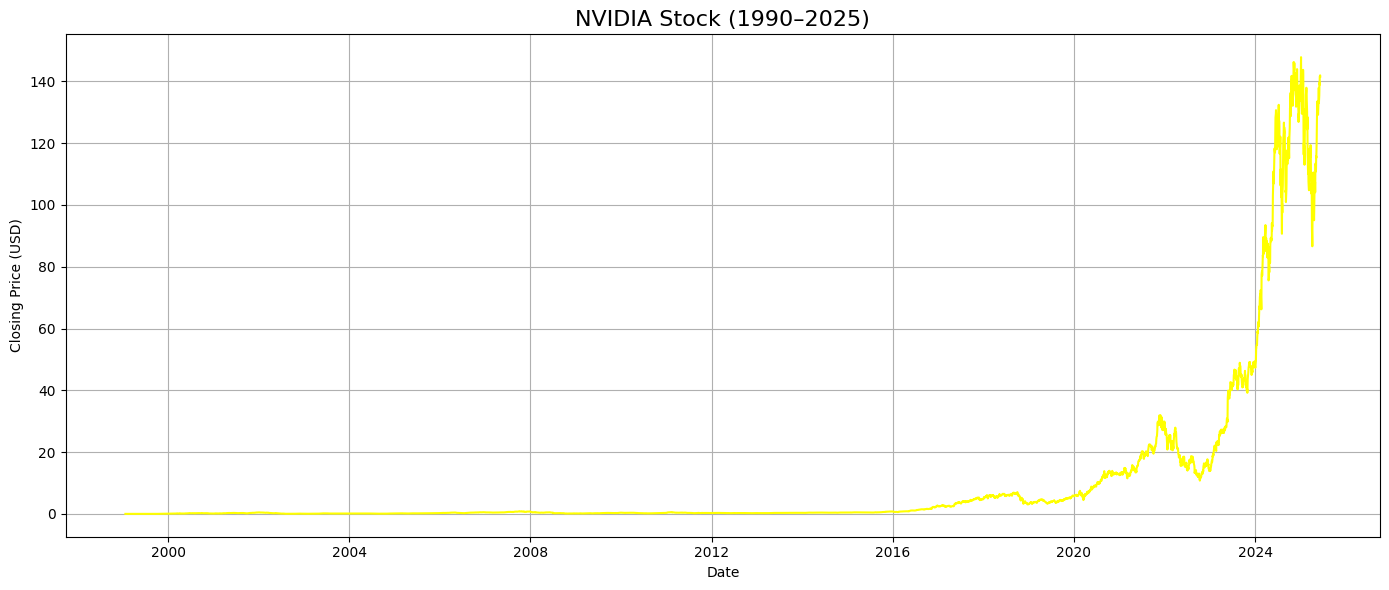

In [88]:
plt.figure(figsize=(14, 6))
# sns.lineplot(data=data_set, x=data_set.index, y='Open', color='red')
# sns.lineplot(data=data_set, x=data_set.index, y='High', color='green')
sns.lineplot(data=data_set, x=data_set.index, y='Low', color='yellow')
# sns.lineplot(data=data_set, x=data_set.index, y='Close', color='blue')
plt.title('NVIDIA Stock (1990–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Taking Input & Output of **Data**

In [89]:
x = data_set.drop(columns = 'Close')
y = data_set.Close

In [90]:
x.head()

,High,Low,Open,Volume
Date,,,,
1999-01-22,0.044775,0.035581,0.040119,2714688000
1999-01-25,0.042029,0.037612,0.040597,510480000
1999-01-26,0.042865,0.037731,0.042029,343200000
1999-01-27,0.039403,0.036298,0.038447,244368000
1999-01-28,0.038447,0.037850,0.038209,227520000


In [91]:
y.head()

,Close
Date,
1999-01-22,0.037612
1999-01-25,0.041552
1999-01-26,0.038328
1999-01-27,0.038209
1999-01-28,0.038089


# Splitting Data for training and testing

In [92]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True ,train_size = 0.2 ,random_state=0)

In [93]:
# print(x_train.shape, x_test.shape ,y_train.shape, y_test.shape)

In [94]:
trained_x = x[:2023]
trained_y = y[:2023]

test_x = x[2023:]
test_y = y[2023:]

# Selecting Model For Performance


In [95]:
lr = LinearRegression()
lr.fit(trained_x, trained_y)

LinearRegression()

In [96]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(trained_x, trained_y)

RandomForestRegressor()

# Tesitng Evaluations

In [97]:
lr_y_test_pred = lr.predict(trained_x)
rf_y_test_pred = rf.predict(trained_x)

In [98]:
print(f'Linear Regression R2 Score: {r2_score(trained_y, lr_y_test_pred)}')
print(f'Random Forest R2 Score: {r2_score(trained_y, rf_y_test_pred)}')

Linear Regression R2 Score: 0.9992184545241469
Random Forest R2 Score: 0.999807171449447


In [99]:
lr_rms = root_mean_squared_error(trained_y, lr_y_test_pred)
rf_rms = root_mean_squared_error(trained_y, rf_y_test_pred)

In [100]:
print(f'Linear Regression RMSE: {lr_rms}')
print(f'Random Forest RMSE: {rf_rms}')

Linear Regression RMSE: 0.0036877236031416416
Random Forest RMSE: 0.001831752971260572


# Predict Data

In [103]:
# We will take random forest for further prediction
input_data = [
    1.4618000, #High
    1.4266000, #Low
    1.4548000, #Open
    242956157] #Volume
input_data_arr = np.array(input_data)
input_data_reshaped = np.reshape(input_data, (1, -1))

prediction = rf.predict(input_data_reshaped)
print(prediction[0])

0.5843055427074433


In [109]:
prediction = rf.predict(test_x)
prediction

array([0.53106139, 0.52084735, 0.51235895, ..., 0.5843728 , 0.5843728 ,
       0.5843728 ])